In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('NFLX.csv')
print(df.head())
print(df.describe())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     3

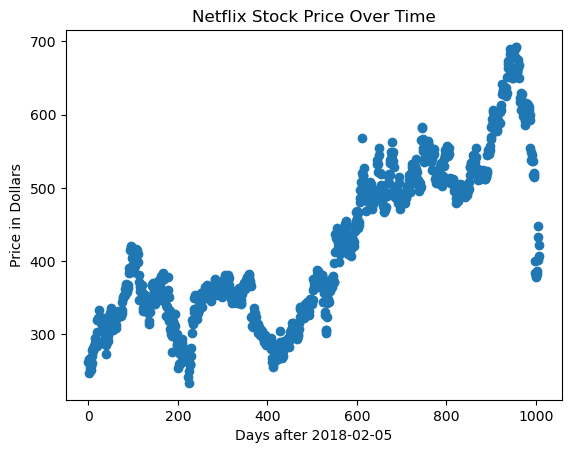

In [160]:
data = df.get('Open').array
data = [float(round(stat, 3)) for stat in data]

plt.scatter([i for i in range(len(data))], data)
plt.title("Netflix Stock Price Over Time")
plt.ylabel("Price in Dollars")
plt.xlabel("Days after 2018-02-05")
plt.show;

In [161]:
def grad_descent_mean(h, data):
    n = len(data) # number of data points in the data set
    residuals_sum = 0
    for i in range(n): # number of summation steps
        residuals_sum = residuals_sum + 2 * (h - data[i]) # derivative of the empirical risk at h
        
    residuals_sum /= n # average slope of the squared loss function
    return residuals_sum

In [162]:
h = 100 # initial prediction to improve upon
mean_arr = []
while abs(grad_descent_mean(h, data)) > 0.00001:
    mean_arr.append(grad_descent_mean(h, data))
    h = h - grad_descent_mean(h, data) * 0.1 # learning rate is 0.1 (can adjust if needed)
print(h) # mean of dataset

419.05966843367133


In [163]:
def grad_descent(m, b, data):
    n = len(data) # number of data points in the data set
    int_residuals_sum = 0
    slope_residuals_sum = 0
    
    for i in range(n):
        int_residuals_sum = int_residuals_sum + 2 * ((m * i + b) - data[i]) # derivative of the empirical risk at b
        
    for x in range(n):
        slope_residuals_sum = slope_residuals_sum + 2 * x * ((m * x + b) - data[x]) # derivative of the empirical risk at m
        
    int_residuals_sum /= n
    slope_residuals_sum /= n
    return (slope_residuals_sum, int_residuals_sum)

In [148]:
m = 0.295 # initial slope to improve upon
b = 273 # initial y-intercept to improve upon
learning_rate = 0.000001 # seems to differ from dataset to dataset (change as needed)
linear_reg_arr = []
count = 0
while abs(grad_descent(m, b, data)[0]) > 0.00001 and abs(grad_descent(m, b, data)[1]) > 0.00001 and count < 100000:
    linear_reg_arr.append(grad_descent(m, b, data))
    m = m - grad_descent(m, b, data)[0] * learning_rate
    b = b - grad_descent(m, b, data)[1] * learning_rate
    count += 1
print(m)
print(b)

0.2964905216977226
272.4262024535022


In [164]:
print(linear_reg_arr[:10])

[(-431.7648364717684, 5.2406541129831465), (-139.1583468968709, 5.675861716400575), (-44.85492796708554, 5.816121697805855), (-14.46211325083084, 5.861323742525805), (-4.666888464122343, 5.875889800879548), (-1.5100097881026757, 5.88058226326335), (-0.49258719575717147, 5.88209258892108), (-0.16468459196665394, 5.882577351636159), (-0.0590056730926958, 5.882731588218099), (-0.02494667381003436, 5.882779300354373)]


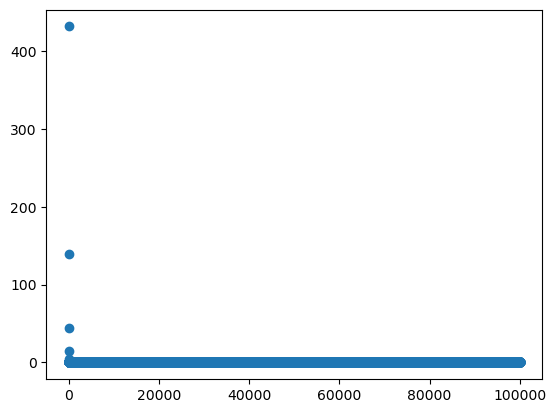

In [165]:
regression = [abs(tup[0]) for tup in linear_reg_arr]
plt.scatter([i for i in range(len(linear_reg_arr))], regression)
plt.show;

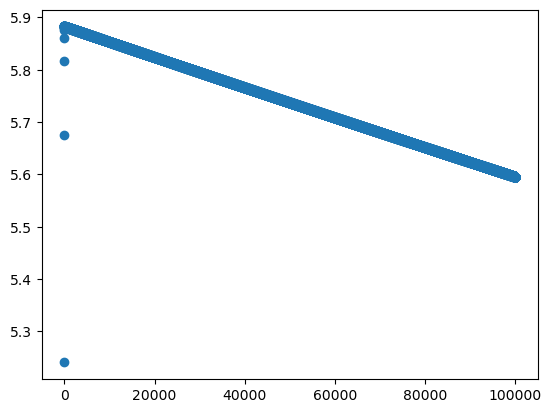

In [166]:
y_intercept = [tup[1] for tup in linear_reg_arr]
plt.scatter([i for i in range(len(linear_reg_arr))], y_intercept)
plt.show;

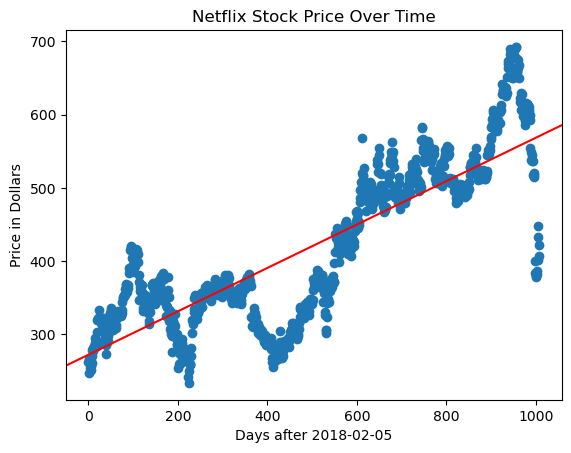

In [167]:
plt.scatter([i for i in range(len(data))], data)
plt.title("Netflix Stock Price Over Time")
plt.ylabel("Price in Dollars")
plt.xlabel("Days after 2018-02-05")
plt.axline((0, 272.4), slope = 0.296, color = 'red')
plt.show;